# Support Vector Machine Classifier

In [38]:
import pandas as pd
import numpy as np
from sklearn import svm

np.random.seed(409781)

label = "rating_label"

train_df = pd.read_csv("train_final_normalised.csv")
train_X = train_df.loc[:, train_df.columns!=label]
train_y = train_df[label]
test_df = pd.read_csv("test_final_normalised.csv")
test_X = test_df.loc[:, test_df.columns!=label]
test_y = test_df[label]
predict_X = pd.read_csv("predict_final_normalised.csv")

### Model Selection

In [39]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils import resample


X_resampled = resample(train_X, n_samples=3000, random_state=1234)
y_resampled = train_y[X_resampled.index]

possible_hyperparams = {'kernel':('rbf', 'linear', 'poly'), 'C': [5], 'degree': [i for i in range(2,15)]}
SVM_classifier = svm.SVC(class_weight='balanced')

grid_search = RandomizedSearchCV(SVM_classifier, possible_hyperparams, n_iter = 15, random_state=5678, scoring='f1_macro')
grid_search.fit(X_resampled, y_resampled)

RandomizedSearchCV(estimator=SVC(class_weight='balanced'), n_iter=15,
                   param_distributions={'C': [5],
                                        'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14],
                                        'kernel': ('rbf', 'linear', 'poly')},
                   random_state=5678, scoring='f1_macro')

In [40]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_degree,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.796673,0.601515,0.070146,0.002213,linear,4,5,"{'kernel': 'linear', 'degree': 4, 'C': 5}",0.357701,0.339704,0.395271,0.386277,0.357715,0.367333,0.020436,10
1,0.487678,0.007366,0.164504,0.003833,rbf,11,5,"{'kernel': 'rbf', 'degree': 11, 'C': 5}",0.432319,0.460870,0.526437,0.493225,0.459089,0.474388,0.032405,1
2,10.869723,0.527032,0.070210,0.001269,linear,7,5,"{'kernel': 'linear', 'degree': 7, 'C': 5}",0.357701,0.339704,0.395271,0.386277,0.357715,0.367333,0.020436,10
3,0.556402,0.008216,0.080438,0.000973,poly,10,5,"{'kernel': 'poly', 'degree': 10, 'C': 5}",0.343270,0.334755,0.373055,0.372880,0.376042,0.360001,0.017383,13
4,0.478121,0.005220,0.161809,0.000536,rbf,6,5,"{'kernel': 'rbf', 'degree': 6, 'C': 5}",0.432319,0.460870,0.526437,0.493225,0.459089,0.474388,0.032405,1
5,0.475432,0.003410,0.161444,0.001215,rbf,9,5,"{'kernel': 'rbf', 'degree': 9, 'C': 5}",0.432319,0.460870,0.526437,0.493225,0.459089,0.474388,0.032405,1
6,0.474607,0.001758,0.161505,0.001353,rbf,14,5,"{'kernel': 'rbf', 'degree': 14, 'C': 5}",0.432319,0.460870,0.526437,0.493225,0.459089,0.474388,0.032405,1
7,0.545176,0.001508,0.079107,0.000714,poly,5,5,"{'kernel': 'poly', 'degree': 5, 'C': 5}",0.369632,0.398765,0.419386,0.409003,0.402668,0.399891,0.016660,8
8,0.546017,0.002780,0.079146,0.000634,poly,8,5,"{'kernel': 'poly', 'degree': 8, 'C': 5}",0.343270,0.357416,0.398626,0.375617,0.376042,0.370194,0.018763,9
9,0.429064,0.002307,0.070490,0.000502,poly,2,5,"{'kernel': 'poly', 'degree': 2, 'C': 5}",0.430147,0.452853,0.474818,0.424598,0.459276,0.448338,0.018632,6


In [41]:
X_resampled = resample(train_X, n_samples=5000, random_state=1215)
y_resampled = train_y[X_resampled.index]
possible_hyperparams = {'kernel':['rbf'], 'C':np.linspace(0.1, 20.0, num=10)}
grid_search_two = GridSearchCV(SVM_classifier, possible_hyperparams, scoring=['accuracy','f1_macro'], refit=False)
grid_search_two.fit(X_resampled, y_resampled)
results = pd.DataFrame(grid_search_two.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,std_test_accuracy,rank_test_accuracy,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,split3_test_f1_macro,split4_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro
0,1.626550,0.013086,0.497072,0.010606,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.489,0.540,0.508,...,0.017118,10,0.401315,0.425068,0.401817,0.419356,0.419205,0.413352,0.009854,10
1,1.229663,0.010290,0.456034,0.003069,2.311111,rbf,"{'C': 2.311111111111111, 'kernel': 'rbf'}",0.656,0.692,0.691,...,0.013571,9,0.523261,0.552878,0.545804,0.536954,0.553036,0.542387,0.011229,3
2,1.268946,0.033843,0.442966,0.009704,4.522222,rbf,"{'C': 4.522222222222221, 'kernel': 'rbf'}",0.682,0.708,0.718,...,0.013705,8,0.531501,0.546033,0.558823,0.548538,0.566360,0.550251,0.011877,1
3,1.273475,0.008397,0.429968,0.002005,6.733333,rbf,"{'C': 6.7333333333333325, 'kernel': 'rbf'}",0.689,0.713,0.720,...,0.015055,6,0.528455,0.545023,0.542950,0.548419,0.558830,0.544735,0.009804,2
4,1.298284,0.008961,0.425793,0.001082,8.944444,rbf,"{'C': 8.944444444444443, 'kernel': 'rbf'}",0.689,0.716,0.721,...,0.014358,4,0.525976,0.546165,0.543199,0.547098,0.545981,0.541684,0.007961,5
5,1.313391,0.024608,0.420579,0.002807,11.155556,rbf,"{'C': 11.155555555555553, 'kernel': 'rbf'}",0.691,0.719,0.723,...,0.015039,2,0.526869,0.549421,0.545112,0.542263,0.545981,0.541929,0.007869,4
6,1.292924,0.006972,0.416661,0.001370,13.366667,rbf,"{'C': 13.366666666666665, 'kernel': 'rbf'}",0.695,0.722,0.722,...,0.012659,1,0.528339,0.549699,0.544037,0.542956,0.541334,0.541273,0.007053,6
7,1.310925,0.009429,0.414407,0.001133,15.577778,rbf,"{'C': 15.577777777777776, 'kernel': 'rbf'}",0.699,0.719,0.722,...,0.011082,3,0.531376,0.546402,0.543647,0.542382,0.539272,0.540616,0.005157,7
8,1.319872,0.010295,0.419212,0.002487,17.788889,rbf,"{'C': 17.788888888888888, 'kernel': 'rbf'}",0.701,0.720,0.716,...,0.009952,7,0.534053,0.546990,0.537908,0.540966,0.539119,0.539807,0.004246,9
9,1.310238,0.007300,0.412676,0.001509,20.0,rbf,"{'C': 20.0, 'kernel': 'rbf'}",0.700,0.716,0.718,...,0.010327,5,0.533482,0.543874,0.540543,0.540819,0.542998,0.540343,0.003657,8


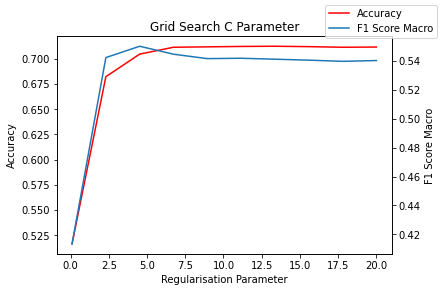

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_title("Grid Search C Parameter")
ax1.plot(results['param_C'], results['mean_test_accuracy'], label = "Accuracy", color = 'red')
ax1.set_xlabel("Regularisation Parameter")
ax1.set_ylabel("Accuracy")
ax2 = ax1.twinx()
ax2.plot(results['param_C'], results['mean_test_f1_macro'], label = "F1 Score Macro")
ax2.set_ylabel("F1 Score Macro")
fig.legend()

### SVM Validation

In [43]:
from sklearn import metrics

def report(a, b):
    reports = [
                metrics.accuracy_score(a, b), 
                metrics.precision_score(a, b, average="macro"),
                metrics.recall_score(a, b, average="macro"),
                metrics.f1_score(a, b, average="macro")
               ]
    return reports

In [44]:
# results[results['rank_test_score'] == 1]

In [45]:
SVM_classifier = svm.SVC(kernel='rbf', class_weight='balanced', C=5.22)

In [46]:
SVM_classifier.fit(train_X, train_y)
res = pd.Series(SVM_classifier.predict(test_X))

In [47]:
evaluation_metrics = report(test_y, res)
evaluation_metrics

[0.6466507695642749,
 0.48478341066909475,
 0.4310946751287799,
 0.44425382236458116]

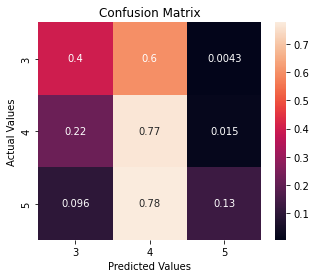

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(test_y, res)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['3','4','5'], 
                     columns = ['3','4','5'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [49]:
pd.Series(res).value_counts()

4.0    3344
3.0    1190
5.0      79
dtype: int64

### SVM Prediction

In [50]:
res = pd.Series(SVM_classifier.predict(predict_X))
res

0       4.0
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
5761    4.0
5762    3.0
5763    4.0
5764    4.0
5765    4.0
Length: 5766, dtype: float64

In [51]:
csv_file = pd.DataFrame(res, columns=[label])
csv_file.insert(0, "id", res.index + 1)
csv_file

,id,rating_label
0,1,4.0
1,2,4.0
2,3,4.0
3,4,4.0
4,5,4.0
...,...,...
5761,5762,4.0
5762,5763,3.0
5763,5764,4.0
5764,5765,4.0


In [52]:
csv_file.to_csv("svm_output.csv", index=False)